In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("climate_data.csv", header=0)
df.head(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [ ]:
print("Dimensi data (baris, kolom):", df.shape)
df.info()
df.columns

Dimensi data (baris, kolom): (589265, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'station_id'],
      dtype='object')

In [ ]:
# Pastikan kolom 'date' diformat sebagai datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

# Filter data antara tahun 2015 hingga 2020 (inklusif)
df_filtered = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2020)]
print("Jumlah baris data dari tahun 2015 sampai 2020:", len(df_filtered))
# Hitung rata-rata semua kolom numerik untuk setiap tanggal
df_grouped = df_filtered.groupby('date').mean(numeric_only=True).reset_index()
df_filtered.tail()

Jumlah baris data dari tahun 2015 sampai 2020: 332570


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980
589264,2020-12-31,24.3,32.0,26.7,86.0,26.6,5.8,7.0,350.0,2.0,C,97980


In [ ]:
# Tampilkan jumlah data kosong per kolom sebelum dibersihkan
print("Jumlah data kosong per kolom (sebelum dibersihkan):\n", df_filtered.isnull().sum())

# Hapus baris yang memiliki nilai kosong
df_cleaned = df_filtered.dropna()

# Tampilkan jumlah baris setelah dibersihkan
print("Jumlah baris setelah menghapus data kosong:", len(df_cleaned))

# Tampilkan jumlah data kosong per kolom setelah dibersihkan
print("Jumlah data kosong per kolom (setelah dibersihkan):\n", df_cleaned.isnull().sum())

Jumlah data kosong per kolom (sebelum dibersihkan):
 date              0
Tn            19031
Tx            29805
Tavg          35674
RH_avg        36920
RR            93671
ss            27363
ff_x           2379
ddd_x          2802
ff_avg         1999
ddd_car        2475
station_id        0
dtype: int64
Jumlah baris setelah menghapus data kosong: 182430
Jumlah data kosong per kolom (setelah dibersihkan):
 date          0
Tn            0
Tx            0
Tavg          0
RH_avg        0
RR            0
ss            0
ff_x          0
ddd_x         0
ff_avg        0
ddd_car       0
station_id    0
dtype: int64


In [ ]:
# Menggabungkan dan menghitung rata-rata untuk setiap tanggal
df_grouped = df_cleaned.groupby('date').agg({
    'Tn': 'mean',
    'Tx': 'mean',
    'Tavg': 'mean',
    'RH_avg': 'mean',
    'RR': 'mean',
    'ss': 'mean',
    'ff_x': 'mean',
    'ddd_x': 'mean',
    'ff_avg': 'mean',
    'station_id': 'first',  # Ambil nilai pertama
    'ddd_car': lambda x: x.mode().iloc[0] if not x.mode().empty else None  # Ambil modus untuk kolom kategorikal
}).reset_index()

# Cek ulang jumlah baris
print("Jumlah baris setelah dikelompokkan per tanggal:", len(df_grouped))
# Tampilkan semua baris
pd.set_option('display.max_rows', None)

# Tampilkan 5 baris pertama
print("\n5 Baris Pertama:")
print(df_grouped.head(5))
# Tampilkan 5 baris terakhir
print("5 Baris Terakhir:")
print(df_grouped.tail(5))


Jumlah baris setelah dikelompokkan per tanggal: 2189

5 Baris Pertama:
        date         Tn         Tx       Tavg     RH_avg         RR        ss  \
0 2015-01-01  23.225352  30.007042  26.084507  86.563380  17.481690  1.566197   
1 2015-01-02  23.793939  30.196970  26.280303  87.090909  18.168182  2.360606   
2 2015-01-03  23.547887  30.174648  26.215493  86.563380  19.029577  2.366197   
3 2015-01-04  23.162121  30.069697  26.124242  85.818182  23.601515  2.646970   
4 2015-01-05  23.301562  30.485937  26.401563  84.500000   9.934375  3.403125   

       ff_x       ddd_x    ff_avg  station_id ddd_car  
0  4.859155  225.183099  2.056338       96009      N   
1  5.272727  247.969697  2.242424       96001      N   
2  5.845070  269.746479  2.422535       96001      N   
3  5.257576  255.424242  2.136364       96001      N   
4  4.906250  241.281250  1.937500       96009      N   
5 Baris Terakhir:
           date         Tn         Tx       Tavg     RH_avg         RR  \
2184 2020-12-2

In [ ]:
print(df_grouped.describe())

                                date           Tn           Tx         Tavg  \
count                           2189  2189.000000  2189.000000  2189.000000   
mean   2017-12-30 03:25:14.664230400    23.591301    31.608394    26.961227   
min              2015-01-01 00:00:00    21.772000    29.582796    25.547312   
25%              2016-07-01 00:00:00    23.297959    31.197727    26.630612   
50%              2017-12-30 00:00:00    23.631884    31.630380    26.951282   
75%              2019-06-30 00:00:00    23.921739    32.014894    27.279348   
max              2020-12-31 00:00:00    27.800000    35.800000    30.800000   
std                              NaN     0.520390     0.621682     0.491158   

            RH_avg           RR           ss         ff_x        ddd_x  \
count  2189.000000  2189.000000  2189.000000  2189.000000  2189.000000   
mean     82.851501     8.666493     5.443168     4.632676   186.434395   
min      66.000000     0.000000     1.566197     3.619565    70.00

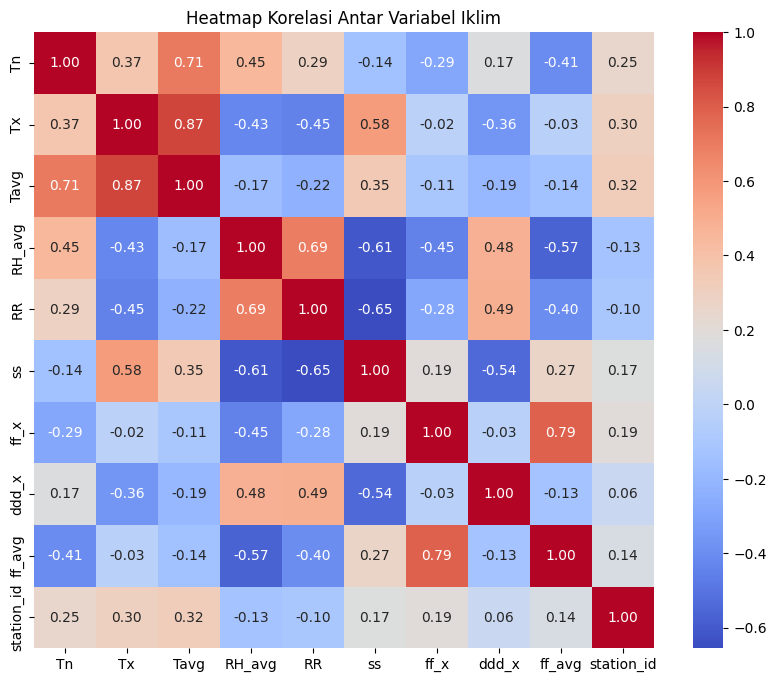

In [ ]:
#Korelasi Antar Variabel Iklim
plt.figure(figsize=(10, 8))
sns.heatmap(df_grouped.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Iklim')
plt.show()

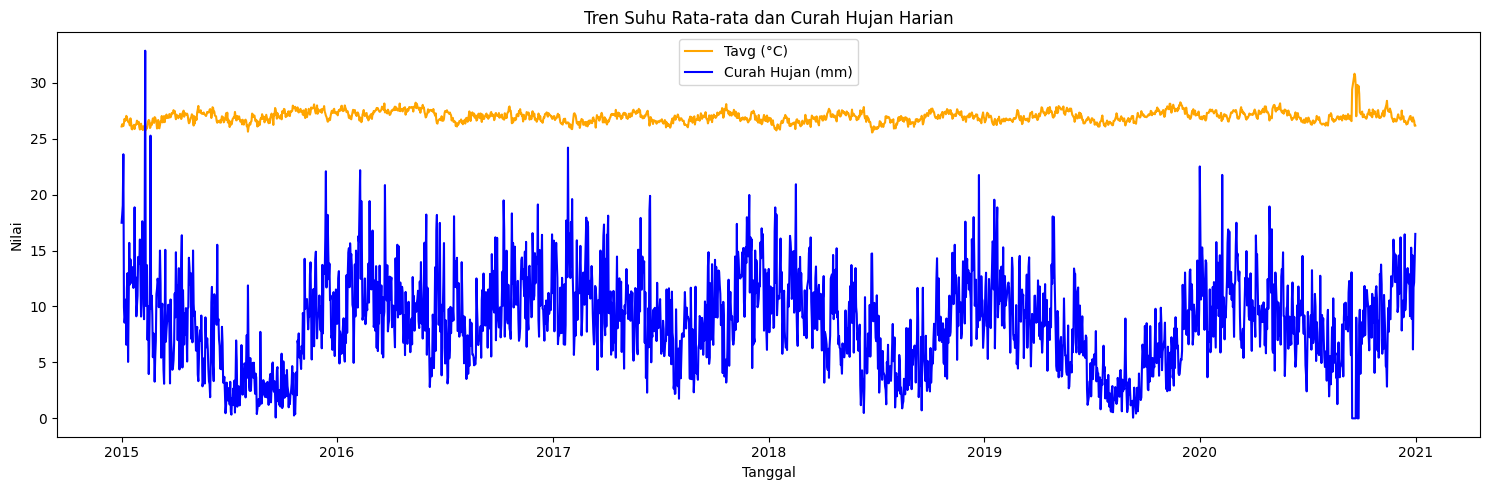

In [ ]:
#Tren Suhu Rata-rata dan Curah Hujan Harian
plt.figure(figsize=(15, 5))
plt.plot(df_grouped['date'], df_grouped['Tavg'], label='Tavg (°C)', color='orange')
plt.plot(df_grouped['date'], df_grouped['RR'], label='Curah Hujan (mm)', color='blue')
plt.title('Tren Suhu Rata-rata dan Curah Hujan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.tight_layout()
plt.show()

Akurasi: 0.9954337899543378


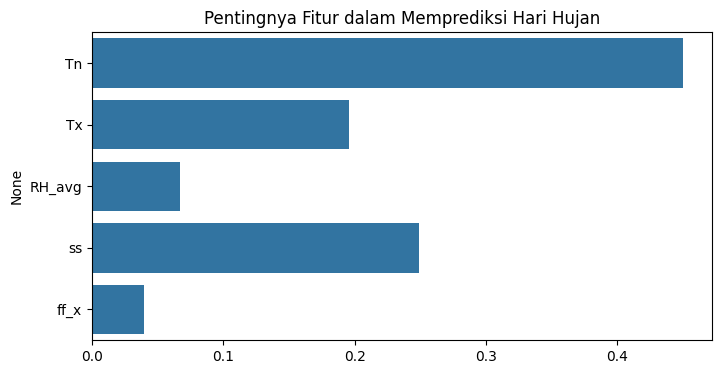

In [ ]:
#Eksperimen 1: Klasifikasi Hari Hujan vs Tidak Hujan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Label: hujan atau tidak
df_grouped['rain'] = df_grouped['RR'].apply(lambda x: 1 if x > 0 else 0)

X = df_grouped[['Tn', 'Tx', 'RH_avg', 'ss', 'ff_x']]
y = df_grouped['rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print("Akurasi:", model_rf.score(X_test, y_test))

# Visualisasi feature importance
importances = model_rf.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=X.columns)
plt.title("Pentingnya Fitur dalam Memprediksi Hari Hujan")
plt.show()


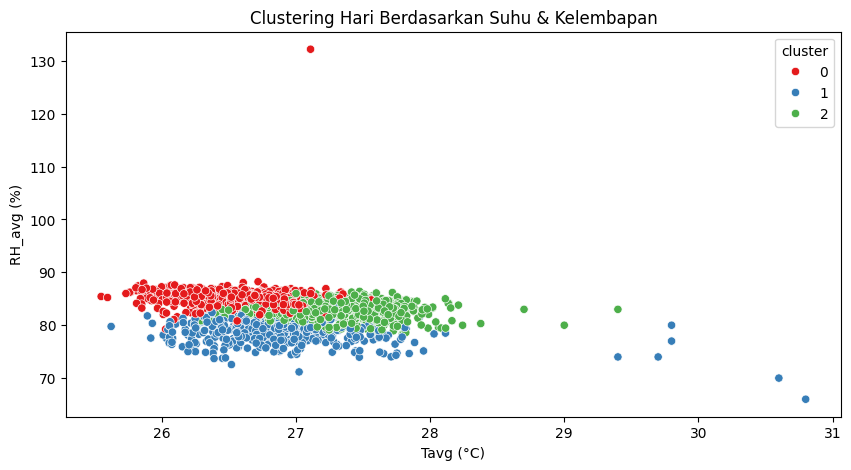

In [ ]:
#Eksperimen 2: Clustering Hari-hari Berdasarkan Cuaca (KMeans)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

X = df_grouped[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi cluster
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Tavg', y='RH_avg', hue='cluster', data=df_grouped, palette='Set1')
plt.title("Clustering Hari Berdasarkan Suhu & Kelembapan")
plt.xlabel("Tavg (°C)")
plt.ylabel("RH_avg (%)")
plt.show()


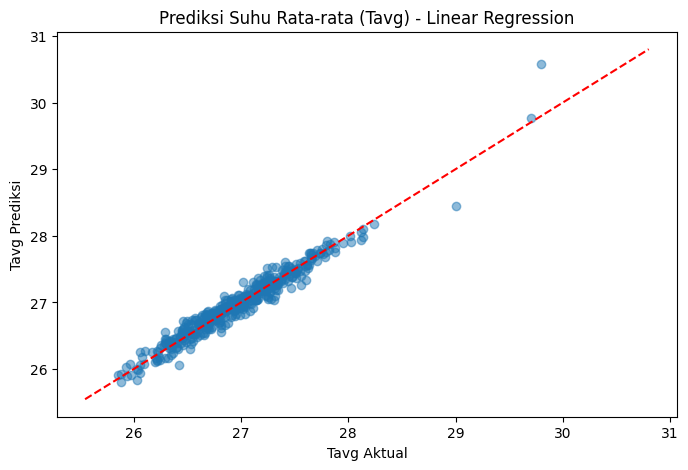

R2 Score: 0.950733148109389
MSE: 0.01249821606954721


In [ ]:
#Eksperiman 3 : Prediksi Suhu Rata-Rata (Tavg) dari Faktor Lainnya
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fitur dan target
X = df_grouped[['Tn', 'Tx', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']]
y = df_grouped['Tavg']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluasi
y_pred = model.predict(X_test)

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Tavg Aktual")
plt.ylabel("Tavg Prediksi")
plt.title("Prediksi Suhu Rata-rata (Tavg) - Linear Regression")
plt.show()

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))